## 3. Working with Autoregressive Modeling [2 Marks]

* [2 marks] Consider the [Daily Temperatures dataset](https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-temperatures.csv) from Australia. This is a dataset for a forecasting task. That is, given temperatures up to date (or period) T, design a forecasting (autoregressive) model to predict the temperature on date T+1. You can refer to [link 1](https://en.wikipedia.org/wiki/Autoregressive_model), [link 2](https://machinelearningmastery.com/autoregression-models-time-series-forecasting-python/) for more information on autoregressive models. Use linear regression as your autoregressive model. Plot the fit of your predictions vs the true values and report the RMSE obtained. A demonstration of the plot is given below.

![Autoregression Plot Example](https://machinelearningmastery.com/wp-content/uploads/2016/08/Autoregressive-Forecasting-with-the-Airline-Passengers-Dataset.png)

Train RMSE: 2.595
Test RMSE: 2.502


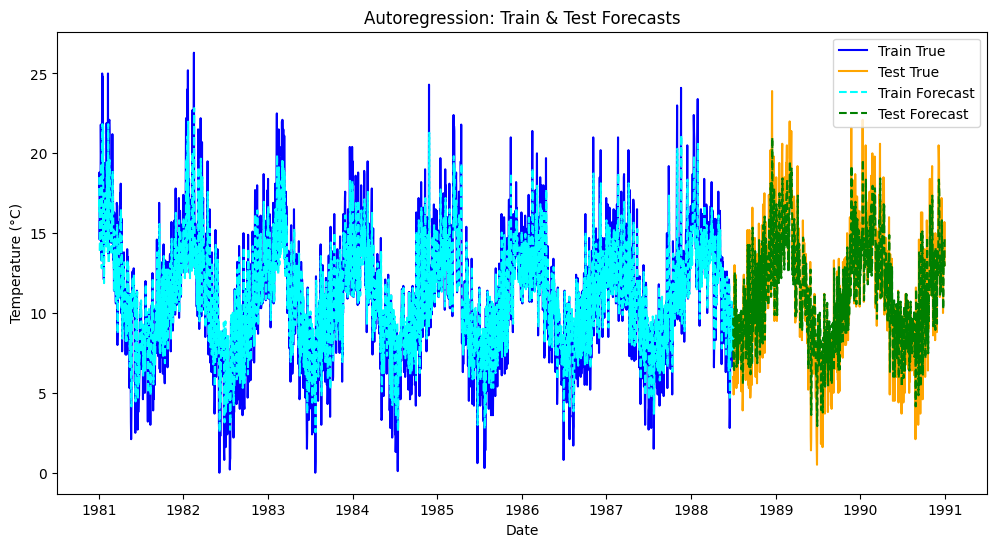

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv'
df = pd.read_csv(url, parse_dates=['Date'])

# Prepare autoregressive data: Temp(t) -> Temp(t+1)
df['Temp_t'] = df['Temp'].shift(1)
df = df.dropna()

X = df[['Temp_t']].values  # Previous day's temperature
y = df['Temp'].values      # Today's temperature
dates = df['Date'].values

# Split index
split = int(len(X) * 0.75)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]
dates_train, dates_test = dates[:split], dates[split:]

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Forecast both train and test
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# RMSE for both
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f"Train RMSE: {rmse_train:.3f}")
print(f"Test RMSE: {rmse_test:.3f}")

# Plot
plt.figure(figsize=(12,6))
plt.plot(dates_train, y_train, label='Train True', color='blue')
plt.plot(dates_test, y_test, label='Test True', color='orange')
plt.plot(dates_train, y_pred_train, label='Train Forecast', color='cyan', linestyle='--')
plt.plot(dates_test, y_pred_test, label='Test Forecast', color='green', linestyle='--')
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.title("Autoregression: Train & Test Forecasts")
plt.legend()
plt.show()
